# Project 3

- **Dataset(s) to be used:** 4 sources
    1. [Happiness measures from Our World In Data](https://ourworldindata.org/happiness-and-life-satisfaction) and its data url: https://ourworldindata.org/grapher/share-of-people-who-say-they-are-happy.csv?v=1&csvType=full&useColumnShortNames=true
    2.  [Population by Country from Our World In Data](https://ourworldindata.org/population-growth)
    3.  [Education Spending by Country from Our World In Data](https://ourworldindata.org/financing-education) and its data url: https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp.csv?v=1&csvType=full&useColumnShortNames=true
    4.  [GDP by Country from Keaggle](https://www.kaggle.com/datasets/alejopaullier/-gdp-by-country-1999-2022) <br><br>
    
- **Analysis question:** In this project, I intend to explore several questions:
    1. if education spending have a positive correlation with happiniess growth?
    2. if education spending have a positive correlation with productivity growth?
    3. if productivity measured by GDP per capital have a positive correlation with happiniess growth? <br><br>

I wish to use these explorations to answer the core curiosity that whether the policy focus on improviding education can promote the happiness directly. If it cannot directly promote happiness, I will be curious if the failure of promoting productivity can explain why the education cannot effectively promote the happiness. Overall, these questions aim to explore how the public efforts in promoting educations can influence the domestic wellbeings.<br><br>
- **Columns that will (likely) be used:**
    1. Country, Entity, and Year column for mergeing
    2. Information columns such as GDP, population, public spending in education, and happiness score <br><br>
  
- **Columns to be used to merge/join them:**
    1. Column for GDP
    2. Column for population
    3. Column for public spending in education
    4. Column for Happiness score<br><br>
- **Hypothesis**: 
    1. The growth in education public spending can promote the growth of happiness
    2. The growth in education public spending can promote the growth of productivity
    3. The growth in productivity have explaining power in understanding the growth of domestic happiness <br><br>
- **Site URL:** [URL from Publish section]

## **STEP 1:** Preparation

### PART 1.1: import the necessary package

In [4]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np

### PART 1.2: import the necessary datasets

In [7]:
edu_spend = pd.read_csv('edu_to_gdp.csv')
population = pd.read_csv('population.csv')
happiness = pd.read_csv('happiness-cantril-ladder.csv')
gdp = pd.read_csv('gdp_country.csv')

### PART 1.3: data check and data cleaning

#### 1.3.1 On **education spending**

In [10]:
edu_spend.info()
edu_spend = edu_spend.rename(columns ={'Public spending on education as a share of GDP':'Public Edu. Spending to GDP'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          5676 non-null   object 
 1   Code                                            5248 non-null   object 
 2   Year                                            5676 non-null   int64  
 3   Public spending on education as a share of GDP  5676 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 177.5+ KB


In [11]:
edu_spend.sample(10)

,Entity,Code,Year,Public Edu. Spending to GDP
3357,Mauritius,MUS,1987,3.01674
4243,Qatar,QAT,2014,3.60535
2310,Iceland,ISL,2006,7.19522
4032,Panama,PAN,2001,4.10588
1136,Costa Rica,CRI,1989,4.07785
3420,Micronesia (country),FSM,2013,12.34400
2292,Hungary,HUN,2017,4.64757
2182,High-income countries,NaN,2015,4.88554
5396,United Kingdom,GBR,2010,5.69868
2599,Jamaica,JAM,2016,5.31461


##### **Note on this dataset**: 
I tried to convert the year into datetime formate, and found that it became less convenient than just keeping the "Year" in the int format because it contains too much unecessary information such as month, date, and specific time. Meanwhile, Keep the "Year" column in int format still allow me to make needed arithmatic comparisons in this project.

#### 1.3.2 On **population**

In [14]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Entity                                                 18944 non-null  object
 1   Year                                                   18944 non-null  int64 
 2   Population - Sex: all - Age: all - Variant: estimates  18944 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 444.1+ KB


In [15]:
population = population.rename(columns ={'Population - Sex: all - Age: all - Variant: estimates':'est. population'})

In [16]:
population.sample(3)

,Entity,Year,est. population
14080,Russia,1970,130367189
6537,Guadeloupe,1975,322469
11820,Namibia,2004,1942087


##### **Note on this dataset:** 
This dateset is pretty clean

#### 1.3.3 On **Happiness**

In [19]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                1787 non-null   object 
 1   Code                  1677 non-null   object 
 2   Year                  1787 non-null   int64  
 3   Cantril ladder score  1787 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 56.0+ KB


In [20]:
happiness = happiness.rename(columns ={'Cantril ladder score':'Happiness Score'})
happiness.sample(3)

,Entity,Code,Year,Happiness Score
1613,Tunisia,TUN,2023,4.4218
557,Georgia,GEO,2018,4.5191
724,Iraq,IRQ,2022,4.9409


#### 1.3.4 On **GDP**

In [22]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  180 non-null    object
 1   1999     180 non-null    object
 2   2000     180 non-null    object
 3   2001     180 non-null    object
 4   2002     180 non-null    object
 5   2003     180 non-null    object
 6   2004     180 non-null    object
 7   2005     180 non-null    object
 8   2006     180 non-null    object
 9   2007     180 non-null    object
 10  2008     180 non-null    object
 11  2009     180 non-null    object
 12  2010     180 non-null    object
 13  2012     180 non-null    object
 14  2013     180 non-null    object
 15  2014     180 non-null    object
 16  2015     180 non-null    object
 17  2016     180 non-null    object
 18  2017     180 non-null    object
 19  2018     180 non-null    object
 20  2019     180 non-null    object
 21  2020     180 non-null    object
 22  20

In [23]:
gdp.sample(3)

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
166,Turkmenistan,3.857,5.022,6.933,8.7,11.424,14.196,17.174,21.846,26.215,...,0,0,44.362,51.271,58.193,65.462,73.974,83.993,53.087,60.263
138,Seychelles,0.623,0.615,0.622,0.698,0.706,0.7,0.723,0.749,0.698,...,1.011,1.084,1.375,1.471,1.555,1.649,1.738,1.825,1.288,1.751
133,Samoa,0.218,0.22,0.232,0.256,0.284,0.309,0.34,0.365,0.387,...,0.717,0.769,0.867,0.9,0.912,0.941,0.976,1.016,0.78,0.808


##### **Note on this dataset**: 
There are several issues with this dataset
1. This data would need to be melt down to match the format of other datasets whose "Year" data is complied in a single Series
2. There are 0 in some values, this project will only use the annual data with full information. Therefore, the program will alter drop away the rows with missing data
3. The GDP is in a format with "," This program will remove these comma

In [25]:
gdp = gdp.melt(
    id_vars = "Country",
    var_name = "Year",
    value_name = "GDP ($bil)"
)

In [26]:
# Clean away the 0 gdp years
gdp["GDP ($bil)"] = pd.to_numeric(gdp["GDP ($bil)"].str.replace(',', '')).replace(0, np.nan)

In [27]:
# convert the types of "Year" to match other dataset
gdp['Year'] = gdp["Year"].astype(int)

In [28]:
# drops the 0 gdp rows
gdp = gdp.dropna()

In [29]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 1 to 4139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4017 non-null   object 
 1   Year        4017 non-null   int32  
 2   GDP ($bil)  4017 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 109.8+ KB


### **STEP 2**: Time to merge the data

This part will take **intersection merge** and the **merging referece is the \[country name, time]** so that this project will only utilize the annual data with full set of information

In [32]:
all_df = pd.merge(left = gdp, right = population, left_on = ['Country', 'Year'], right_on = ['Entity', 'Year'])
all_df.drop(columns = ['Entity'], inplace = True)

In [33]:
all_df = pd.merge(left = all_df, right = happiness, left_on = ['Country', 'Year'], right_on = ['Entity', 'Year'])
all_df.drop(columns = ['Entity','Code'], inplace = True)

In [34]:
all_df = pd.merge(left = all_df, right = edu_spend, left_on = ['Country', 'Year'], right_on = ['Entity', 'Year'])
all_df.drop(columns = ['Entity','Code'], inplace = True)

In [35]:
all_df

,Country,Year,GDP ($bil),est. population,Happiness Score,Public Edu. Spending to GDP
0,Albania,2014,16.053,2903748,4.9590,3.216967
1,Algeria,2014,203.449,39205035,5.6050,6.548898
2,Angola,2014,151.089,27160766,4.0330,2.930000
3,Argentina,2014,347.731,43024072,6.5740,5.361440
4,Armenia,2014,10.821,2922433,4.3500,2.247240
...,...,...,...,...,...,...
1033,United Kingdom,2022,3442.210,68179315,6.7956,4.959176
1034,Uruguay,2022,63.741,3390913,6.4939,4.507330
1035,Uzbekistan,2022,72.762,34938955,6.0143,5.234772
1036,Vietnam,2022,415.493,99680656,5.7633,2.887387


**Note on current dataset**: Even after several rounds of intersection merging and data deletion, the data still match the requirements:
1. it has over 1000 rows
2. it is still complex enough

## **STEP 3**: Data Calculation

##### **Note on this step:**
This part will calculate the following
1. Public spending in education per capital: to measure how much the government invest in citizens' education
2. gdp per capital: to measure the productivity of the country - which is the production per citizens in a year

In [39]:
all_df['Edu. Spending per capita'] = all_df['GDP ($bil)'] * 1000000000 * (all_df['Public Edu. Spending to GDP'] / 100)/ all_df['est. population']

In [40]:
all_df['gdp per capita'] = all_df['GDP ($bil)'] * 1000000000 / all_df['est. population']

In [41]:
all_df.sample(5)

,Country,Year,GDP ($bil),est. population,Happiness Score,Public Edu. Spending to GDP,Edu. Spending per capita,gdp per capita
302,Lesotho,2016,2.096,2130426,3.8080,7.552474,74.304320,983.840791
287,Hungary,2016,124.012,9810530,5.3240,4.615480,583.429138,12640.703407
288,Iceland,2016,17.775,335572,7.5040,7.432200,3936.781227,52969.258460
755,El Salvador,2020,31.358,6234680,6.0605,3.660880,184.127934,5029.608577
731,Bangladesh,2020,310.858,166298024,5.0246,1.765281,32.998083,1869.282584


In [42]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1038 non-null   object 
 1   Year                         1038 non-null   int32  
 2   GDP ($bil)                   1038 non-null   float64
 3   est. population              1038 non-null   int64  
 4   Happiness Score              1038 non-null   float64
 5   Public Edu. Spending to GDP  1038 non-null   float64
 6   Edu. Spending per capita     1038 non-null   float64
 7   gdp per capita               1038 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 60.9+ KB


## **STEP 4**: Check Correlation

This part will utilize the current Dataframe to testify the correlations among variables. The intention is to find if public spending in education can improve the sense of happniess of citizens within different countries. Because I conjecture that the economic condition should usually explain the improve living condition and thus the higher happiness levels in different countries. Therefore, I intend to see public spending in education can improve the economy. And eventually, I want to check if the correlation between economic growth and happiness growth are related.

### **4.1 Hypothesis 1**: correlation between public education spending and happiness growth

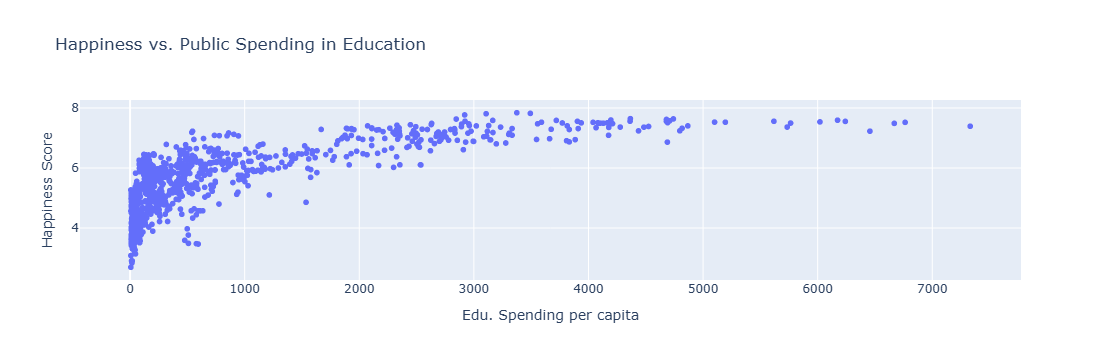

In [45]:
graph1 = px.scatter(
    all_df,
    x = 'Edu. Spending per capita',
    y = 'Happiness Score',
    title = 'Happiness vs. Public Spending in Education',
)

graph1.show()

#### **Findings 4.1.1**
**To Hypothesis 1:**
Without distinguishing the countries, the graph shows that:
1. the public spending in education per capital has positive correlation with the happiness score
2. however, the marginal correlation diminishes as the spending per capital goes higher

**Next**: pick few countries from the data and testify if different countries have different spending performance

In [47]:
sample_country = list(all_df.sample(10)['Country'].unique())

In [48]:
sample_country_df = all_df[all_df['Country'].isin(sample_country)]

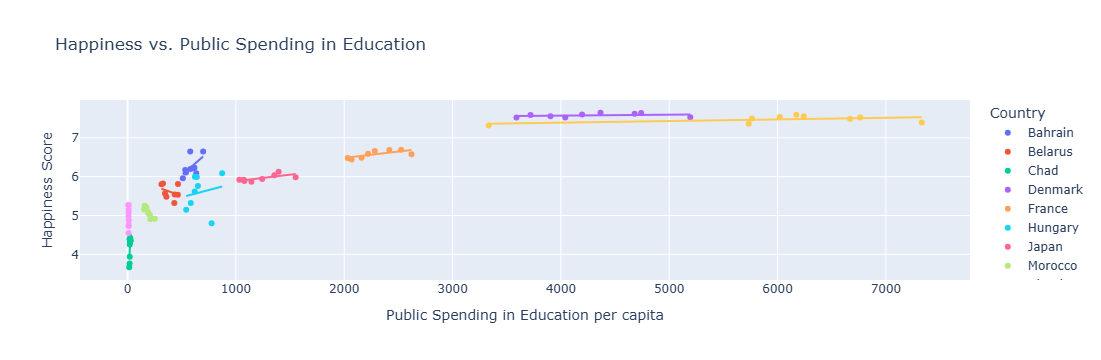

In [49]:
graph2 = px.scatter(
    sample_country_df,
    x = 'Edu. Spending per capita',
    y = 'Happiness Score',
    color = 'Country',
    title = 'Happiness vs. Public Spending in Education',
    trendline = 'ols',
    labels ={'Edu. Spending per capita':'Public Spending in Education per capita'}
)
graph2.show()

#### **Findings 4.1.1**
This roughly reflects the results mentioned. However, this correlation seems ineffective mathmatically becasue the countries with similar level of spending per capita have significant difference in their ols slopes.

### **4.2 Hypothesis 2**: correlation between public education spending and productivity growth

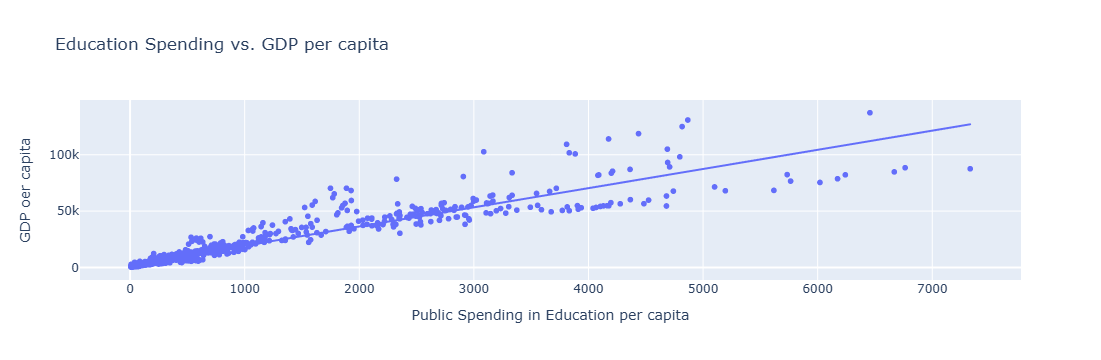

In [52]:
graph3 = px.scatter(
    all_df,
    x = 'Edu. Spending per capita',
    y = 'gdp per capita',
    title = 'Education Spending vs. GDP per capita',
    labels ={'Edu. Spending per capita':'Public Spending in Education per capita', 'gdp per capita':'GDP oer capita'},
    trendline = 'ols'
)

graph3.show()

In [53]:
px.get_trendline_results(graph3).iloc[0,0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     8326.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:45:14   Log-Likelihood:                -10705.
No. Observations:                1038   AIC:                         2.141e+04
Df Residuals:                    1036   BIC:                         2.142e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2333.2592    272.283      8.569      0.000    1798.971    2867.548
x1            17.0074      0.186     91.245      0.000      16.642      17.373
==============================================================================
Omnibus:                      477.664   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8125.076
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                      16.291   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Findings 4.2.1**

**To Hypothesis 2:**
Without distinguishing the countries, the graph shows that:
1. the public spending in education per capital has positive correlation with GDP per capita
2. however, such a correlation becomes unclear as the spending grows to a higher level (in the graph, higher than 3000 dollars per capita)
<br><br>

**Next**: pick few countries from the data and testify if different countries have different spending performance

In [55]:
sample_country = list(all_df.sample(10)['Country'].unique())
sample_country_df = all_df[all_df['Country'].isin(sample_country)]

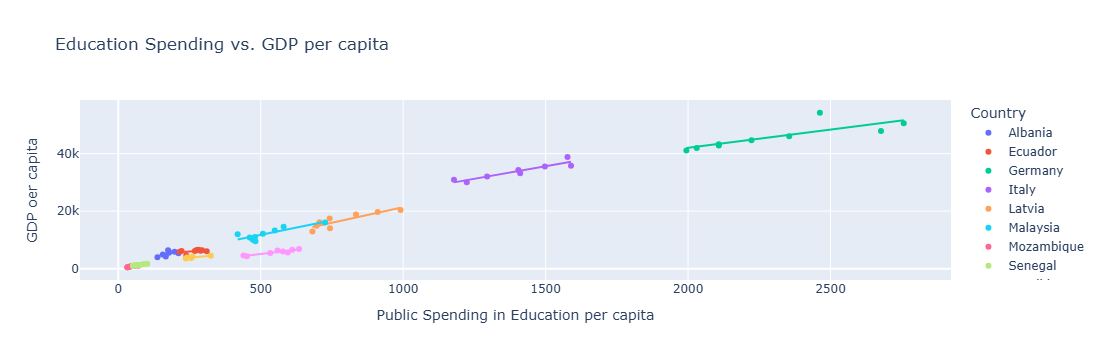

In [56]:
graph4 = px.scatter(
    sample_country_df,
    x = 'Edu. Spending per capita',
    y = 'gdp per capita',
    title = 'Education Spending vs. GDP per capita',
    labels ={'Edu. Spending per capita':'Public Spending in Education per capita', 'gdp per capita':'GDP oer capita'},
    trendline = 'ols',
    color = 'Country'
)
graph4.show()

#### **Findings 4.2.1**
**Result**: the nation-level graph shows a clear positive correlation between public spending in education per capita and GDP per capital

### **4.3 Hypothesis 3**: correlation between productivity growth and Happiness Scores

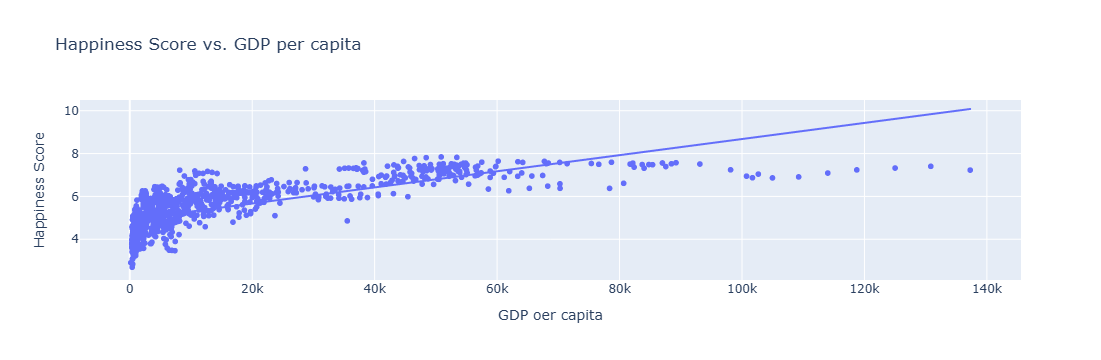

In [59]:
graph5 = px.scatter(
    all_df,
    x = 'gdp per capita',
    y = 'Happiness Score',
    title = 'Happiness Score vs. GDP per capita',
    labels ={'gdp per capita':'GDP oer capita'},
    trendline = 'ols'
)

graph5.show()

In [60]:
px.get_trendline_results(graph5).iloc[0,0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1215.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          8.91e-177
Time:                        17:45:15   Log-Likelihood:                -1189.8
No. Observations:                1038   AIC:                             2384.
Df Residuals:                    1036   BIC:                             2393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9159      0.029    167.405      0.000       4.858       4.973
x1          3.762e-05   1.08e-06     34.857      0.000    3.55e-05    3.97e-05
==============================================================================
Omnibus:                       31.282   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.558
Skew:                          -0.440   Prob(JB):                     5.16e-08
Kurtosis:                       3.030   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Findings 4.3.1**

**To Hypothesis 3:**
Without distinguishing the countries, the graph shows that:
1. the GDP per capita has positive correlation with the happiness score
2. however, the marginal correlation diminishes as the GDP per capita grows to a higher level

In [62]:
sample_country = list(all_df.sample(10)['Country'].unique())
sample_country_df = all_df[all_df['Country'].isin(sample_country)]

F:\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide



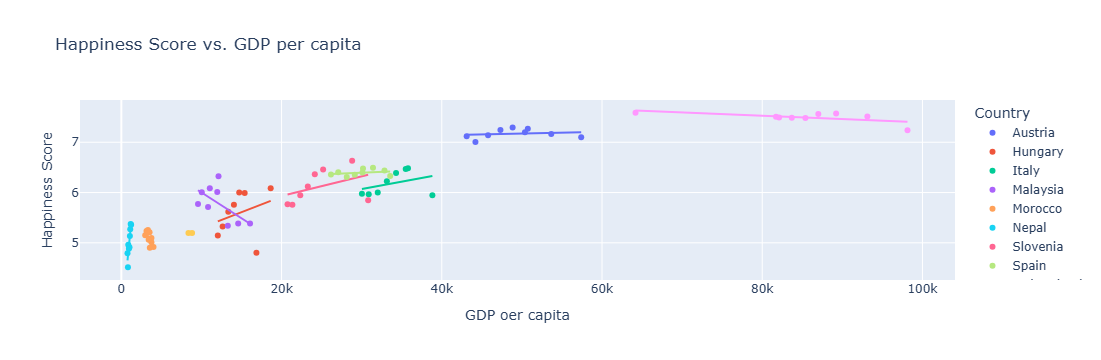

In [63]:
graph6 = px.scatter(
    sample_country_df,
    x = 'gdp per capita',
    y = 'Happiness Score',
    title = 'Happiness Score vs. GDP per capita',
    labels ={'gdp per capita':'GDP oer capita'},
    trendline = 'ols',
    color = 'Country'
)
graph6.show()

#### **Findings 4.3.1**

**Note:** Similar to the correlation between public spending in education and happiness level, the correlation between the two indicators seems ineffective. The countries with similar levels of GDP per capita have significant difference in their ols slopes.

## **STEP 5:** Conclusion and Closing

This project investigates the relationship between education spending, productivity (measured by GDP per capita), and happiness growth across countries. The analysis revolves around three key hypotheses:<br>
Hypotheses: <br>
Education Spending and Happiness Growth:<br>
Hypothesis: Increased public spending on education promotes happiness growth.<br>
Education Spending and Productivity Growth:<br>
Hypothesis: Increased public spending on education promotes productivity growth.<br>
Productivity Growth and Happiness Growth:<br>
Hypothesis: Growth in productivity explains the growth in domestic happiness.<br>

### **Key Findings:**
- Hypothesis 1:<br>
    - A positive correlation exists between public education spending per capita and happiness scores. However:
        - The correlation diminishes as spending grows, suggesting diminishing returns.
        - Variability in the results among countries suggests that additional factors affect the relationship.
- Hypothesis 2:
    - Public education spending per capita is positively correlated with GDP per capita.
    - The correlation weakens for countries with higher levels of education spending (above $3000 per capita).
- Hypothesis 3:
    - GDP per capita correlates positively with happiness scores.
    - Similar to Hypothesis 1, the marginal correlation diminishes as GDP per capita increases.

### **Conclusion:**
The analysis suggests that while public spending on education has a positive impact on both productivity and happiness, its effectiveness diminishes at higher levels of spending. Additionally, the variability among countries indicates that the impact of education spending is influenced by other country-specific factors. The diminishing returns observed in both happiness and productivity highlight the complexity of using public policy to influence well-being directly. <br><br>

Overall, while education spending contributes to societal well-being, it is not a standalone solution, and its influence depends on broader contextual and policy frameworks. ​

### **Future Improvement:**
This project provides valuable insights into the relationship between education spending, productivity, and happiness, but there are areas for improvement to enhance the robustness and depth of the analysis. 
<br><br>
Future work could incorporate additional variables such as **income inequality**, **healthcare access**, or **cultural factors** that might mediate the relationship between education spending and happiness. Furthermore, **distinguishing** between the **quality and quantity of education spending** could provide a more nuanced understanding of its impact. Longitudinal analyses that **track changes over time** for individual countries could also shed light on causal relationships. **Expanding** the dataset to include more countries and regions, especially from underrepresented areas, would increase the generalizability of the findings. 
<br><br>
Lastly, employing advanced statistical models or machine learning techniques could help identify complex, non-linear relationships and interactions among variables. These enhancements would provide a more comprehensive framework to inform policy-making and further explore the pathways between education, productivity, and well-being.

### **Policy Implication:**
The findings of this project suggest that public investment in education plays a significant role in fostering both economic productivity and societal happiness. However, the observed diminishing returns at higher levels of spending highlight the **importance of optimizing resource allocation.** Policymakers should focus not only on increasing education budgets but also on improving the effectiveness and efficiency of education spending. This could include **prioritizing equitable access to quality education,** tailoring policies to address country-specific needs, and complementing education investment with other supportive measures such as healthcare, job creation, and community well-being programs. 
<br><br>
Additionally, the positive link between productivity and happiness underscores the need for policies that **integrate economic growth strategies with well-being frameworks**, ensuring that **productivity gains translate into improvements in the quality of life.** Policymakers should adopt a holistic approach that balances economic, social, and cultural factors to maximize the societal impact of public spending on education.